In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
!cp -RT '/content/gdrive/My Drive/Space/msl-images' /

In [3]:
import os
os.getcwd()


'/content'

In [4]:
os.chdir("../")

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
os.getcwd()

'/'

In [8]:
os.chdir('../')

In [9]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [10]:
import pandas as pd 
train = pd.read_csv("train-calibrated-shuffled.txt", sep=" ", header=None)

In [11]:
train.head()

,0,1
0,calibrated/0077ML0005780000102730I01_DRCL.JPG,15
1,calibrated/0072MR0005610170103642E01_DRCL.JPG,8
2,calibrated/0069MR0004130000103477I01_DRCL.JPG,21
3,calibrated/0154ML0008510010104492E01_DRCL.JPG,8
4,calibrated/0019MR0000530000100138C00_DRCL.JPG,8


In [12]:
len(train)

3746

In [13]:
train.columns=['id','label']
train.head()

,id,label
0,calibrated/0077ML0005780000102730I01_DRCL.JPG,15
1,calibrated/0072MR0005610170103642E01_DRCL.JPG,8
2,calibrated/0069MR0004130000103477I01_DRCL.JPG,21
3,calibrated/0154ML0008510010104492E01_DRCL.JPG,8
4,calibrated/0019MR0000530000100138C00_DRCL.JPG,8


In [14]:
test = pd.read_csv("test-calibrated-shuffled.txt", sep=" ")
test.columns=['id','label']

len(test)



1304

In [15]:
test.head()

,id,label
0,calibrated/0640MH0002640000203781I01_DRCL.JPG,24
1,calibrated/0647MH0003250050203806E01_DRCL.JPG,9
2,calibrated/0844MR0037590000501001I01_DRCL.JPG,7
3,calibrated/0618MR0026460020401253I01_DRCL.JPG,11
4,calibrated/0605MH0003060010203269I01_DRCL.JPG,8


In [16]:
val = pd.read_csv("val-calibrated-shuffled.txt", sep=" ")
val.columns=['id','label']


In [17]:
val.head()

,id,label
0,calibrated/0270MH0002530050102760I01_DRCL.JPG,5
1,calibrated/0549MH0002620000201566E01_DRCL.JPG,24
2,calibrated/0229MR0009720000202913E01_DRCL.JPG,0
3,calibrated/0292MH0002810020103613C00_DRCL.JPG,5
4,calibrated/0552MH0002620000201620I01_DRCL.JPG,24


In [18]:
len(val)

1639

In [19]:
import os

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
import torchvision
import tarfile
import torchvision
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn
from torchvision.utils import make_grid
import torchvision.models as models
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
os.getcwd()

'/'

In [22]:
!rm -rf /aboli

In [23]:
!mkdir /aboli

In [24]:
!mkdir /aboli/class_0
!mkdir /aboli/class_1
!mkdir /aboli/class_2
!mkdir /aboli/class_3
!mkdir /aboli/class_4
!mkdir /aboli/class_5
!mkdir /aboli/class_6
!mkdir /aboli/class_7
!mkdir /aboli/class_8
!mkdir /aboli/class_9
!mkdir /aboli/class_10
!mkdir /aboli/class_11
!mkdir /aboli/class_12
!mkdir /aboli/class_13
!mkdir /aboli/class_14
!mkdir /aboli/class_15
!mkdir /aboli/class_16
!mkdir /aboli/class_17
!mkdir /aboli/class_18
!mkdir /aboli/class_19
!mkdir /aboli/class_20
!mkdir /aboli/class_21
!mkdir /aboli/class_23
!mkdir /aboli/class_24

In [25]:
val.head()

,id,label
0,calibrated/0270MH0002530050102760I01_DRCL.JPG,5
1,calibrated/0549MH0002620000201566E01_DRCL.JPG,24
2,calibrated/0229MR0009720000202913E01_DRCL.JPG,0
3,calibrated/0292MH0002810020103613C00_DRCL.JPG,5
4,calibrated/0552MH0002620000201620I01_DRCL.JPG,24


In [26]:
train.head()

,id,label
0,calibrated/0077ML0005780000102730I01_DRCL.JPG,15
1,calibrated/0072MR0005610170103642E01_DRCL.JPG,8
2,calibrated/0069MR0004130000103477I01_DRCL.JPG,21
3,calibrated/0154ML0008510010104492E01_DRCL.JPG,8
4,calibrated/0019MR0000530000100138C00_DRCL.JPG,8


In [27]:
import os,shutil

x = 0
for i in train.index:
  try:
    fileo = '/' + str(train.at[i,"id"])   
    shutil.copy2(fileo, "/aboli/class_" + str(train.at[i,"label"]) + "/")
  except:
    print( str(train.at[i,"id"]))
    
     

In [28]:
x = 0
for i in test.index:
  try:
    fileo = '/' + str(test.at[i,"id"])   
    shutil.copy2(fileo, "/aboli/class_" + str(test.at[i,"label"]) + "/")
  except:
    print( str(test.at[i,"id"]))
    

In [29]:
x = 0
for i in val.index:
  try:
    fileo = '/' + str(val.at[i,"id"])   
    shutil.copy2(fileo, "/aboli/class_" + str(val.at[i,"label"]) + "/")
  except:
    print( str(val.at[i,"id"]))

In [30]:
data_dir ="/aboli"


In [31]:
transformer = torchvision.transforms.Compose(
    [  # Applying Augmentation
        torchvision.transforms.Resize((224, 224)),
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
        torchvision.transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomRotation(40),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]
        ),
    ]
)
database = ImageFolder(data_dir, transform=transformer)

In [32]:
database.classes

['class_0',
 'class_1',
 'class_10',
 'class_11',
 'class_12',
 'class_13',
 'class_14',
 'class_15',
 'class_16',
 'class_17',
 'class_18',
 'class_19',
 'class_2',
 'class_20',
 'class_21',
 'class_23',
 'class_24',
 'class_3',
 'class_4',
 'class_5',
 'class_6',
 'class_7',
 'class_8',
 'class_9']

In [33]:
flower_name_dict={'class_0':0 ,
                  'class_1':1,
                  'class_2':2 ,
                  'class_3':3 ,
                  'class_4':4,
                  'class_5':5 ,
                  'class_6':6,
                  'class_7':7 ,
                  'class_8':8 ,
                  'class_9':9,
                  'class_10':10 ,
                  'class_11':11,
                  'class_12':12 ,
                  'class_13':13 ,
                  'class_14':14,
                  'class_15':15 ,
                  'class_16':16,
                  'class_17':17 ,
                  'class_18':18 ,
                  'class_19':19,
                  'class_20':20 ,
                  'class_21':21,
                  'class_23':22 ,
                  'class_24':23                  
                  
                  }

def encode_label(img_label):
    return flower_name_dict[img_label] 

In [34]:
flower_label = {
                  0: 'class_0',
                  1: 'class_1',
                  2: 'class_2' ,
                  3: 'class_3' ,
                  4: 'class_4',
                  5: 'class_5' ,
                  6: 'class_6',
                  7: 'class_7' ,
                  8: 'class_8' ,
                  9: 'class_9',
                  10: 'class_10',
                  11: 'class_11',
                  12: 'class_12' ,
                  13: 'class_13' ,
                  14: 'class_14',
                  15: 'class_15' ,
                  16: 'class_16',
                  17: 'class_17' ,
                  18: 'class_18' ,
                  19: 'class_19',
                  20: 'class_20' ,
                  21: 'class_21',
        
                  22: 'class_23' ,
                  23: 'class_24'   
}

In [35]:
def show_batch(dl,invert=True):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

def show_sample(image, label,invert=True):
    print("Label :" +database.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

In [36]:
ls /calibrated | wc -l

6737


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label :class_0(0)


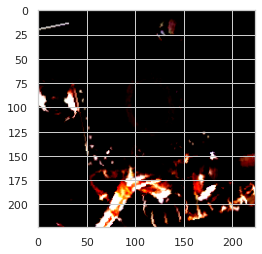

In [37]:
show_sample(*database[1])

In [38]:
validation_size = 2943
training_size = len(database) - validation_size

In [39]:
train_ds, val_ds_main = random_split(database,[training_size, validation_size])
val_ds, test_ds  = random_split(val_ds_main,[1639, 1304])
len(train_ds), len(val_ds)

(3746, 1639)

In [40]:
batch_size=32

In [41]:
train_dl = DataLoader(train_ds, batch_size , shuffle=True)
val_dl = DataLoader(val_ds,batch_size)
test_dl = DataLoader(test_ds, batch_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


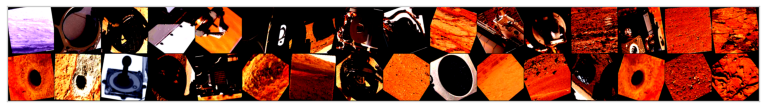

In [42]:
show_batch(train_dl,invert=True)

In [43]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history


In [44]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)
device = get_default_device()

In [45]:
device = get_default_device()
device

device(type='cpu')

In [46]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class FlowerClassification(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [47]:
!pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=36933ac0b09328682dce6f35d8951a74edc5f9f366ae174e1d3f52bc9be8a66e
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch


In [48]:
from efficientnet_pytorch import EfficientNet

In [49]:
#new efficientnet model

class FlowerModel18(FlowerClassification):
    
    
    # block 1
    def block_1_1(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(in_features, 64, kernel_size=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(inplace=True)
        )

    def block_1_2(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(64, 64, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(inplace=True)
        )

    def block_1_3(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(64, 256, kernel_size=1),
            torch.nn.BatchNorm2d(256)
        )    
        
    # block 2
    def block_2_init_1(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(in_features, 128, kernel_size=1, stride=2),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(inplace=True)
        )

    def block_2_init_2(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(128, 128, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(inplace=True)
        )

    def block_2_init_3(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(128, 512, kernel_size=1),
            torch.nn.BatchNorm2d(512)
        )
    
    def block_2_1(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(in_features, 128, kernel_size=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(inplace=True)
        )

    def block_2_2(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(128, 128, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(inplace=True)
        )

    def block_2_3(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(128, 512, kernel_size=1),
            torch.nn.BatchNorm2d(512)
        )
    
    # block 3
    def block_3_init_1(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(in_features, 256, kernel_size=1, stride=2),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(inplace=True)
        )

    def block_3_init_2(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(256, 256, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(inplace=True)
        )

    def block_3_init_3(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(256, 1024, kernel_size=1),
            torch.nn.BatchNorm2d(1024)
        )
    
    def block_3_1(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(in_features, 256, kernel_size=1),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(inplace=True)
        )

    def block_3_2(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(256, 256, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(inplace=True)
        )

    def block_3_3(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(256, 1024, kernel_size=1),
            torch.nn.BatchNorm2d(1024)
        )
    
    # block 4
    def block_4_init_1(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(in_features, 512, kernel_size=1, stride=2),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(inplace=True)
        )

    def block_4_init_2(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(512, 512, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(inplace=True)
        )

    def block_4_init_3(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(512, 2048, kernel_size=1),
            torch.nn.BatchNorm2d(2048)
        )
    
    def block_4_1(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(in_features, 512, kernel_size=1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(inplace=True)
        )

    def block_4_2(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(512, 512, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(inplace=True)
        )

    def block_4_3(self, in_features):
        return torch.nn.Sequential(
            torch.nn.Conv2d(512, 2048, kernel_size=1),
            torch.nn.BatchNorm2d(2048)
        )
    
    
    # init function
    def __init__(self, num_classes = 24):
        super(FlowerModel18, self).__init__()
        
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(inplace=True)
        )
        
        self.pool = torch.nn.Sequential(torch.nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

        # spatial attention
        self.spatial_attention = torch.nn.Sequential(
            torch.nn.Conv2d(2, 1, kernel_size=7, padding=3, stride=1),
            torch.nn.BatchNorm2d(1),
            torch.nn.Sigmoid()
        )

        # channel attention
        self.max_pool_11 = torch.nn.Sequential(torch.nn.MaxPool2d(kernel_size=112, stride=112))
        self.max_pool_1 = torch.nn.Sequential(torch.nn.MaxPool2d(kernel_size=56, stride=56))
        self.max_pool_2 = torch.nn.Sequential(torch.nn.MaxPool2d(kernel_size=28, stride=28))
        self.max_pool_3 = torch.nn.Sequential(torch.nn.MaxPool2d(kernel_size=14, stride=14))
        self.max_pool_4 = torch.nn.Sequential(torch.nn.MaxPool2d(kernel_size=7, stride=7))
        self.avg_pool_11 = torch.nn.Sequential(torch.nn.AvgPool2d(kernel_size=112, stride=112))
        self.avg_pool_1 = torch.nn.Sequential(torch.nn.AvgPool2d(kernel_size=56, stride=56))
        self.avg_pool_2 = torch.nn.Sequential(torch.nn.AvgPool2d(kernel_size=28, stride=28))
        self.avg_pool_3 = torch.nn.Sequential(torch.nn.AvgPool2d(kernel_size=14, stride=14))
        self.avg_pool_4 = torch.nn.Sequential(torch.nn.AvgPool2d(kernel_size=7, stride=7))

        # block 1
        self.resnet_block_1_1_1 = self.block_1_1(64)
        self.resnet_block_1_1_2 = self.block_1_2(64)
        self.resnet_block_1_1_3 = self.block_1_3(64)
        self.resnet_block_1_2_1 = self.block_1_1(256)
        self.resnet_block_1_2_2 = self.block_1_2(256)
        self.resnet_block_1_2_3 = self.block_1_3(256)
        self.resnet_block_1_3_1 = self.block_1_1(256)
        self.resnet_block_1_3_2 = self.block_1_2(256)
        self.resnet_block_1_3_3 = self.block_1_3(256)
        
        # block 2
        self.resnet_block_2_1_1 = self.block_2_init_1(256)
        self.resnet_block_2_1_2 = self.block_2_init_2(256)
        self.resnet_block_2_1_3 = self.block_2_init_3(256)
        self.resnet_block_2_2_1 = self.block_2_1(512)
        self.resnet_block_2_2_2 = self.block_2_2(512)
        self.resnet_block_2_2_3 = self.block_2_3(512)
        self.resnet_block_2_3_1 = self.block_2_1(512)
        self.resnet_block_2_3_2 = self.block_2_2(512)
        self.resnet_block_2_3_3 = self.block_2_3(512)
        self.resnet_block_2_4_1 = self.block_2_1(512)
        self.resnet_block_2_4_2 = self.block_2_2(512)
        self.resnet_block_2_4_3 = self.block_2_3(512)
        
        # block 3
        self.resnet_block_3_1_1 = self.block_3_init_1(512)
        self.resnet_block_3_1_2 = self.block_3_init_2(512)
        self.resnet_block_3_1_3 = self.block_3_init_3(512)
        self.resnet_block_3_2_1 = self.block_3_1(1024)
        self.resnet_block_3_2_2 = self.block_3_2(1024)
        self.resnet_block_3_2_3 = self.block_3_3(1024)
        self.resnet_block_3_3_1 = self.block_3_1(1024)
        self.resnet_block_3_3_2 = self.block_3_2(1024)
        self.resnet_block_3_3_3 = self.block_3_3(1024)
        self.resnet_block_3_4_1 = self.block_3_1(1024)
        self.resnet_block_3_4_2 = self.block_3_2(1024)
        self.resnet_block_3_4_3 = self.block_3_3(1024)
        self.resnet_block_3_5_1 = self.block_3_1(1024)
        self.resnet_block_3_5_2 = self.block_3_2(1024)
        self.resnet_block_3_5_3 = self.block_3_3(1024)
        self.resnet_block_3_6_1 = self.block_3_1(1024)
        self.resnet_block_3_6_2 = self.block_3_2(1024)
        self.resnet_block_3_6_3 = self.block_3_3(1024)
        
        # block 4
        self.resnet_block_4_1_1 = self.block_4_init_1(1024)
        self.resnet_block_4_1_2 = self.block_4_init_2(1024)
        self.resnet_block_4_1_3 = self.block_4_init_3(1024)
        self.resnet_block_4_2_1 = self.block_4_1(2048)
        self.resnet_block_4_2_2 = self.block_4_2(2048)
        self.resnet_block_4_2_3 = self.block_4_3(2048)
        self.resnet_block_4_3_1 = self.block_4_1(2048)
        self.resnet_block_4_3_2 = self.block_4_2(2048)
        self.resnet_block_4_3_3 = self.block_4_3(2048)
        
        self.avgpool = torch.nn.AdaptiveAvgPool2d(7)
        
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(2048 * 7 * 7, num_classes)
        )
        
        self.relu = torch.nn.Sequential(
            torch.nn.ReLU(inplace=True)
        )
        
        self.skip_connection_1 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 256, kernel_size=1),
            torch.nn.BatchNorm2d(256)
        )
        
        self.skip_connection_2 = torch.nn.Sequential(
            torch.nn.Conv2d(256, 512, kernel_size=1, stride=2),
            torch.nn.BatchNorm2d(512)
        )
        
        self.skip_connection_3 = torch.nn.Sequential(
            torch.nn.Conv2d(512, 1024, kernel_size=1, stride=2),
            torch.nn.BatchNorm2d(1024)
        )
        
        self.skip_connection_4 = torch.nn.Sequential(
            torch.nn.Conv2d(1024, 2048, kernel_size=1, stride=2),
            torch.nn.BatchNorm2d(2048)
        )
        
        
    # define forward function
    def forward(self, x):
        
        # apply initial conv layers
        x = self.features(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_11(x) + self.avg_pool_11(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x = self.pool(x)
        
        # block 1
        input = x
        x = self.resnet_block_1_1_1(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_1(x) + self.avg_pool_1(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x = self.resnet_block_1_1_2(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_1(x) + self.avg_pool_1(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x_1 = self.resnet_block_1_1_3(x)
        input = self.skip_connection_1(input)
        x = torch.add(input, x_1)
        x = self.relu(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_1(x) + self.avg_pool_1(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        input = x
        x = self.resnet_block_1_2_1(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_1(x) + self.avg_pool_1(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x = self.resnet_block_1_2_2(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_1(x) + self.avg_pool_1(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x_1 = self.resnet_block_1_2_3(x)
        x = torch.add(input, x_1)
        x = self.relu(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_1(x) + self.avg_pool_1(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        input = x
        x = self.resnet_block_1_3_1(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_1(x) + self.avg_pool_1(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x = self.resnet_block_1_3_2(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_1(x) + self.avg_pool_1(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x_1 = self.resnet_block_1_3_3(x)
        x = torch.add(input, x_1)
        x = self.relu(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_1(x) + self.avg_pool_1(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        
        # block 2
        input = x
        x = self.resnet_block_2_1_1(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_2(x) + self.avg_pool_2(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x = self.resnet_block_2_1_2(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_2(x) + self.avg_pool_2(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x_1 = self.resnet_block_2_1_3(x)
        input = self.skip_connection_2(input)
        x = torch.add(input, x_1)
        x = self.relu(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_2(x) + self.avg_pool_2(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        input = x
        x = self.resnet_block_2_2_1(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_2(x) + self.avg_pool_2(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x = self.resnet_block_2_2_2(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_2(x) + self.avg_pool_2(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x_1 = self.resnet_block_2_2_3(x)
        x = torch.add(input, x_1)
        x = self.relu(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_2(x) + self.avg_pool_2(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        input = x
        x = self.resnet_block_2_3_1(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_2(x) + self.avg_pool_2(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x = self.resnet_block_2_3_2(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_2(x) + self.avg_pool_2(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x_1 = self.resnet_block_2_3_3(x)
        x = torch.add(input, x_1)
        x = self.relu(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_2(x) + self.avg_pool_2(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        input = x
        x = self.resnet_block_2_4_1(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_2(x) + self.avg_pool_2(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x = self.resnet_block_2_4_2(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_2(x) + self.avg_pool_2(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x_1 = self.resnet_block_2_4_3(x)
        x = torch.add(input, x_1)
        x = self.relu(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_2(x) + self.avg_pool_2(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        
        # block 3
        input = x
        x = self.resnet_block_3_1_1(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_3(x) + self.avg_pool_3(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x = self.resnet_block_3_1_2(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_3(x) + self.avg_pool_3(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x_1 = self.resnet_block_3_1_3(x)
        input = self.skip_connection_3(input)
        x = torch.add(input, x_1)
        x = self.relu(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_3(x) + self.avg_pool_3(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        input = x
        x = self.resnet_block_3_2_1(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_3(x) + self.avg_pool_3(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x = self.resnet_block_3_2_2(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_3(x) + self.avg_pool_3(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x_1 = self.resnet_block_3_2_3(x)
        x = torch.add(input, x_1)
        x = self.relu(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_3(x) + self.avg_pool_3(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        input = x
        x = self.resnet_block_3_3_1(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_3(x) + self.avg_pool_3(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x = self.resnet_block_3_3_2(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_3(x) + self.avg_pool_3(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x_1 = self.resnet_block_3_3_3(x)
        x = torch.add(input, x_1)
        x = self.relu(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_3(x) + self.avg_pool_3(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        input = x
        x = self.resnet_block_3_4_1(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_3(x) + self.avg_pool_3(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x = self.resnet_block_3_4_2(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_3(x) + self.avg_pool_3(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x_1 = self.resnet_block_3_4_3(x)
        x = torch.add(input, x_1)
        x = self.relu(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_3(x) + self.avg_pool_3(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        input = x
        x = self.resnet_block_3_5_1(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_3(x) + self.avg_pool_3(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x = self.resnet_block_3_5_2(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_3(x) + self.avg_pool_3(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x_1 = self.resnet_block_3_5_3(x)
        x = torch.add(input, x_1)
        x = self.relu(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_3(x) + self.avg_pool_3(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        input = x
        x = self.resnet_block_3_6_1(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_3(x) + self.avg_pool_3(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x = self.resnet_block_3_6_2(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_3(x) + self.avg_pool_3(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x_1 = self.resnet_block_3_6_3(x)
        x = torch.add(input, x_1)
        x = self.relu(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_3(x) + self.avg_pool_3(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        
        # block 4
        input = x
        x = self.resnet_block_4_1_1(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_4(x) + self.avg_pool_4(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x = self.resnet_block_4_1_2(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_4(x) + self.avg_pool_4(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x_1 = self.resnet_block_4_1_3(x)
        input = self.skip_connection_4(input)
        x = torch.add(input, x_1)
        x = self.relu(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_4(x) + self.avg_pool_4(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        input = x
        x = self.resnet_block_4_2_1(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_4(x) + self.avg_pool_4(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x = self.resnet_block_4_2_2(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_4(x) + self.avg_pool_4(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x_1 = self.resnet_block_4_2_3(x)
        x = torch.add(input, x_1)
        x = self.relu(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_4(x) + self.avg_pool_4(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        input = x
        x = self.resnet_block_4_3_1(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_4(x) + self.avg_pool_4(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x = self.resnet_block_4_3_2(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_4(x) + self.avg_pool_4(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        x_1 = self.resnet_block_4_3_3(x)
        x = torch.add(input, x_1)
        x = self.relu(x)
        scale = torch.nn.functional.sigmoid(self.max_pool_4(x) + self.avg_pool_4(x)).expand_as(x)
        x = x * scale
        scale = torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        
        x = self.avgpool(x)
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)
        return x

In [50]:
#Resnet50

model = FlowerModel18()
model.to(device)
evaluate(model, val_dl)

{'val_acc': 0.07606455683708191, 'val_loss': 3.177835702896118}

In [51]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.0001

In [ ]:
%%time
try3 = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

In [ ]:
evaluate(model, train_dl)

In [ ]:
evaluate(model, val_dl)

In [ ]:
evaluate(model, test_dl)

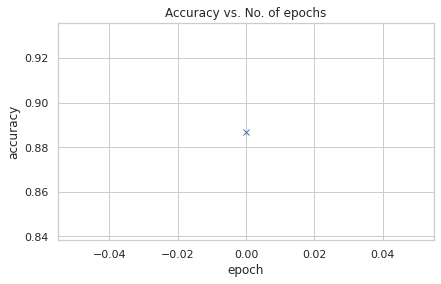

In [ ]:
def plot_accuracies(try3):
    accuracies = [x['val_acc'] for x in try3]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

plot_accuracies(try3)

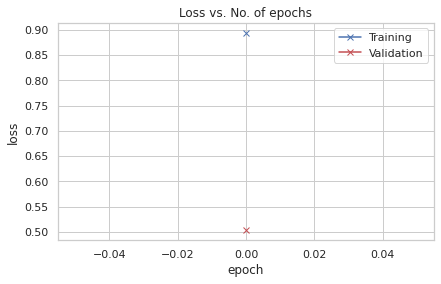

In [ ]:
def plot_losses(try3):
    train_losses = [x.get('train_loss') for x in try3]
    val_losses = [x['val_loss'] for x in try3]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');
plot_losses(try3)

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return flower_label[preds[0].item()]

Loaded pretrained weights for efficientnet-b0
Label: class_8 , Predicted: class_9


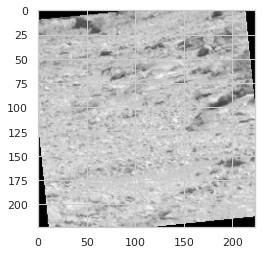

In [ ]:
img, label = test_ds[17]
plt.imshow(img[0], cmap='gray')
print('Label:', database.classes[label], ', Predicted:', predict_image(img, FlowerModel18()))


Loaded pretrained weights for efficientnet-b0
Label: class_8 , Predicted: class_2


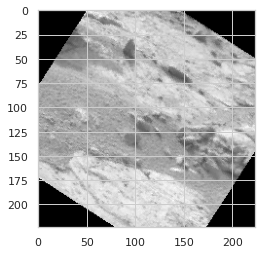

In [ ]:
img, label = test_ds[10]
plt.imshow(img[0], cmap='gray')
print('Label:', database.classes[label], ', Predicted:', predict_image(img, FlowerModel18()))



In [ ]:
torch.save(model.state_dict(), '/content/gdrive/My Drive/Space/efficientnet.pth')

In [ ]:
from sklearn import metrics as sk_metrics
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report

y_pred = []
y_valid = []
for ind, batch in enumerate(test_dl):
    pred_probs = model(batch[0])
    y_pred.extend(pred_probs.argmax(axis=-1).cpu().numpy())
    y_valid.extend(batch[1])

# Calculate needed metrics
print(f'Accuracy score on test data:\t{sk_metrics.accuracy_score(y_valid, y_pred)}')
print(f'Macro F1 score on test data:\t{sk_metrics.f1_score(y_valid, y_pred, average="macro")}')

Accuracy score on test data:	0.8895705521472392
Macro F1 score on test data:	0.6170568707674969


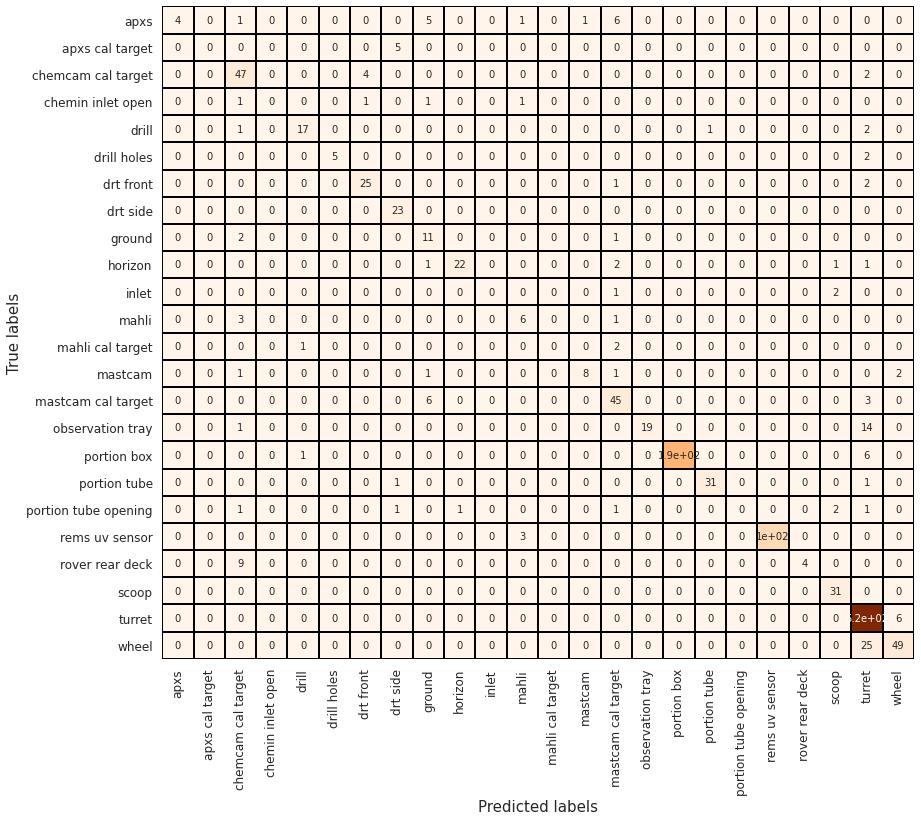

In [ ]:
# Calculate confusion matrix
labels = ["apxs","apxs cal target","chemcam cal target","chemin inlet open","drill","drill holes","drt front","drt side","ground","horizon","inlet","mahli","mahli cal target","mastcam","mastcam cal target","observation tray","portion box","portion tube","portion tube opening","rems uv sensor","rover rear deck","scoop","turret","wheel"]
confusion_matrix = sk_metrics.confusion_matrix(y_valid, y_pred)
df_confusion_matrix = pd.DataFrame(confusion_matrix,index=labels,columns=labels)

# Show confusion matrix
plt.figure(figsize=(12, 12))
sn.heatmap(df_confusion_matrix, annot=True, cbar=False, cmap='Oranges', linewidths=1, linecolor='black')
plt.xlabel('Predicted labels', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('True labels', fontsize=15)
plt.yticks(fontsize=12);


In [ ]:
cm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
accuracies = cm.diagonal()
list_acc =  accuracies.tolist()
list_acc.append(0)
list_acc.append(0)
list_acc.append(0)

report = classification_report(y_valid, y_pred,                        
                               output_dict=True,
                               target_names=labels)
report_df = pd.DataFrame(report).transpose()
report_df["accuracy"] = list_acc
pd.set_option("display.max_rows", None)
report_df.head(134)

,precision,recall,f1-score,support,accuracy
apxs,1.000000,0.222222,0.363636,18.000000,0.222222
apxs cal target,0.000000,0.000000,0.000000,5.000000,0.000000
chemcam cal target,0.701493,0.886792,0.783333,53.000000,0.886792
chemin inlet open,0.000000,0.000000,0.000000,4.000000,0.000000
drill,0.894737,0.809524,0.850000,21.000000,0.809524
drill holes,1.000000,0.714286,0.833333,7.000000,0.714286
drt front,0.833333,0.892857,0.862069,28.000000,0.892857
drt side,0.766667,1.000000,0.867925,23.000000,1.000000
ground,0.440000,0.785714,0.564103,14.000000,0.785714
horizon,0.956522,0.814815,0.880000,27.000000,0.814815
